In [1]:
import numpy as np
from scipy.special import jnp_zeros
import pylab as pl

# setting some constants
G_max = 3e-1 # T/m

D_csf = 3e-9 # m^2/s
D_intra_par = 2e-9 # m^2/s
D_extra_par = 2e-9 # m^2/s

gamma = 42.57e6 * 2*np.pi # rad/s T

delta_min = 5e-3 # s

T2_wm = 8e-2 # s

In [14]:
def cyl_par_van(gammagyro, g, D, sdel, bdel, R, maxM = 10):
	# Van Gelderen 1994, eq. 11
	# maxM = 10 is more than enough, 5 would work OK
	am = jnp_zeros(1,maxM) / float(R)
	am2 = am**2
	tot = 0
	for m in range(1,maxM+1):
		a = am2[m-1]
		tot += (2*D*a*sdel - 2 + 2*np.exp(-D*a*sdel) + 2*np.exp(-D*a*bdel) - np.exp(-D*a*(bdel-sdel)) - np.exp(-D*a*(bdel+sdel))) / (D**2 * a**3 * (a*R**2 - 1))
	tot *= -2 * gammagyro**2 * g**2
	return tot # ln(S/S_0) = tot

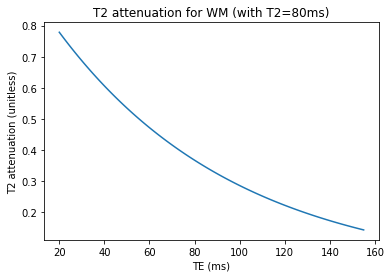

In [15]:
TE = np.linspace(2e-2,1.55e-1,100)
T2_attenuation = np.exp(-TE/T2_wm)
pl.figure()
pl.plot(TE*1e3, T2_attenuation)
pl.xlabel('TE (ms)')
pl.ylabel('T2 attenuation (unitless)')
pl.title('T2 attenuation for WM (with T2=80ms)')
pl.show()

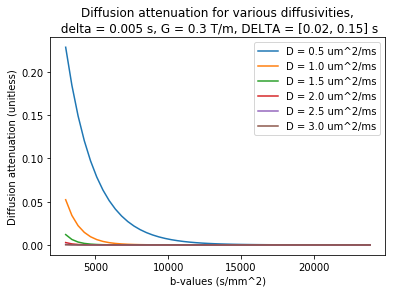

In [32]:
delta = delta_min
G = G_max
ADC = np.linspace(0.5, 3, 6)*1e-9 # m^2/s

DELTA = np.linspace(2e-2, 1.5e-1) # s

bvalues = (gamma*delta*G)**2 * (DELTA - (delta/3.)) # s/m^2

fig = pl.figure()
ax1 = fig.add_subplot(111)
for D in ADC:
    diff_attenuation = np.exp(-bvalues*D)
    ax1.plot(bvalues*1e-6, diff_attenuation, label='D = {} um^2/ms'.format(D*1e9))
#     ax1.plot(DELTA*1e3, diff_attenuation, label='D = {} um^2/ms'.format(D*1e9))
pl.legend()
pl.xlabel('b-values (s/mm^2)')
# pl.xlabel('DELTA (ms)')
pl.ylabel('Diffusion attenuation (unitless)')
pl.title('Diffusion attenuation for various diffusivities,\n delta = {} s, G = {} T/m, DELTA = [{}, {}] s'.format(delta, G, DELTA.min(), DELTA.max()))
pl.show()


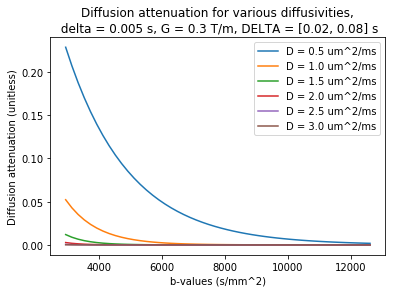

In [33]:
delta = delta_min
G = G_max
ADC = np.linspace(0.5, 3, 6)*1e-9 # m^2/s

DELTA = np.linspace(2e-2, 8e-2) # s

bvalues = (gamma*delta*G)**2 * (DELTA - (delta/3.)) # s/m^2

fig = pl.figure()
ax1 = fig.add_subplot(111)
for D in ADC:
    diff_attenuation = np.exp(-bvalues*D)
    ax1.plot(bvalues*1e-6, diff_attenuation, label='D = {} um^2/ms'.format(D*1e9))
#     ax1.plot(DELTA*1e3, diff_attenuation, label='D = {} um^2/ms'.format(D*1e9))
pl.legend()
pl.xlabel('b-values (s/mm^2)')
# pl.xlabel('DELTA (ms)')
pl.ylabel('Diffusion attenuation (unitless)')
pl.title('Diffusion attenuation for various diffusivities,\n delta = {} s, G = {} T/m, DELTA = [{}, {}] s'.format(delta, G, DELTA.min(), DELTA.max()))
pl.show()

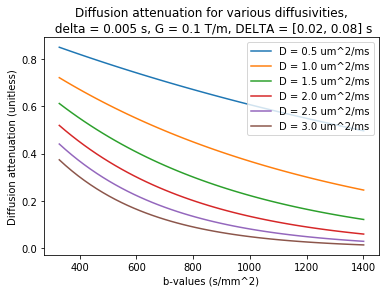

In [40]:
delta = delta_min
G = G_max/3.
ADC = np.linspace(0.5, 3, 6)*1e-9 # m^2/s

DELTA = np.linspace(2e-2, 8e-2) # s

bvalues = (gamma*delta*G)**2 * (DELTA - (delta/3.)) # s/m^2

fig = pl.figure()
ax1 = fig.add_subplot(111)
for D in ADC:
    diff_attenuation = np.exp(-bvalues*D)
    ax1.plot(bvalues*1e-6, diff_attenuation, label='D = {} um^2/ms'.format(D*1e9))
#     ax1.plot(DELTA*1e3, diff_attenuation, label='D = {} um^2/ms'.format(D*1e9))
pl.legend()
pl.xlabel('b-values (s/mm^2)')
# pl.xlabel('DELTA (ms)')
pl.ylabel('Diffusion attenuation (unitless)')
pl.title('Diffusion attenuation for various diffusivities,\n delta = {} s, G = {} T/m, DELTA = [{}, {}] s'.format(delta, G, DELTA.min(), DELTA.max()))
pl.show()

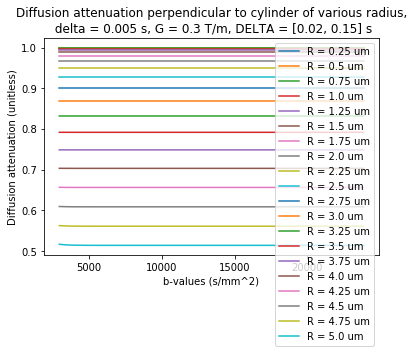

In [45]:
delta = delta_min
G = G_max
ADC = 2e-9 # m^2/s
rad = np.linspace(0.25e-6, 5e-6, 20)

DELTA = np.linspace(2e-2, 1.5e-1) # s

bvalues = (gamma*delta*G)**2 * (DELTA - (delta/3.)) # s/m^2

fig = pl.figure()
ax1 = fig.add_subplot(111)
for R in rad:
    data = []
    for bdel in DELTA:
        data.append(np.exp(cyl_par_van(gamma, G, ADC, delta, bdel, R, maxM = 10)))
    diff_attenuation = np.array(data)
    ax1.plot(bvalues*1e-6, diff_attenuation, label='R = {} um'.format(R*1e6))
pl.legend()
pl.xlabel('b-values (s/mm^2)')
# pl.xlabel('DELTA (ms)')
pl.ylabel('Diffusion attenuation (unitless)')
pl.title('Diffusion attenuation perpendicular to cylinder of various radius,\n delta = {} s, G = {} T/m, DELTA = [{}, {}] s'.format(delta, G, DELTA.min(), DELTA.max()))
pl.show()

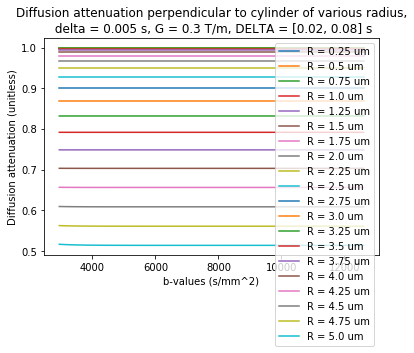

In [46]:
delta = delta_min
G = G_max
ADC = 2e-9 # m^2/s
rad = np.linspace(0.25e-6, 5e-6, 20)

DELTA = np.linspace(2e-2, 8e-2) # s

bvalues = (gamma*delta*G)**2 * (DELTA - (delta/3.)) # s/m^2

fig = pl.figure()
ax1 = fig.add_subplot(111)
for R in rad:
    data = []
    for bdel in DELTA:
        data.append(np.exp(cyl_par_van(gamma, G, ADC, delta, bdel, R, maxM = 10)))
    diff_attenuation = np.array(data)
    ax1.plot(bvalues*1e-6, diff_attenuation, label='R = {} um'.format(R*1e6))
pl.legend()
pl.xlabel('b-values (s/mm^2)')
# pl.xlabel('DELTA (ms)')
pl.ylabel('Diffusion attenuation (unitless)')
pl.title('Diffusion attenuation perpendicular to cylinder of various radius,\n delta = {} s, G = {} T/m, DELTA = [{}, {}] s'.format(delta, G, DELTA.min(), DELTA.max()))
pl.show()

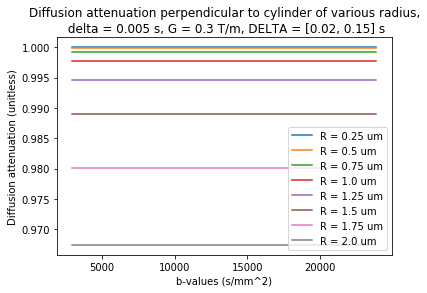

In [53]:
delta = delta_min
G = G_max
ADC = 2e-9 # m^2/s
rad = np.linspace(0.25e-6, 2e-6, 8)

DELTA = np.linspace(2e-2, 1.5e-1) # s

bvalues = (gamma*delta*G)**2 * (DELTA - (delta/3.)) # s/m^2

fig = pl.figure()
ax1 = fig.add_subplot(111)
for R in rad:
    data = []
    for bdel in DELTA:
        data.append(np.exp(cyl_par_van(gamma, G, ADC, delta, bdel, R, maxM = 10)))
    diff_attenuation = np.array(data)
    ax1.plot(bvalues*1e-6, diff_attenuation, label='R = {} um'.format(R*1e6))
pl.legend(loc=4)
pl.xlabel('b-values (s/mm^2)')
# pl.xlabel('DELTA (ms)')
pl.ylabel('Diffusion attenuation (unitless)')
pl.title('Diffusion attenuation perpendicular to cylinder of various radius,\n delta = {} s, G = {} T/m, DELTA = [{}, {}] s'.format(delta, G, DELTA.min(), DELTA.max()))
pl.show()

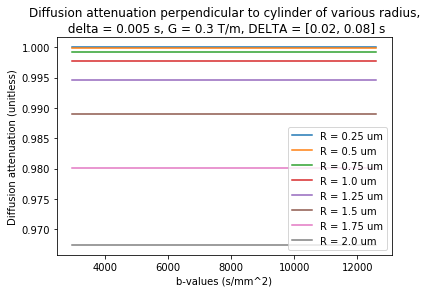

In [54]:
delta = delta_min
G = G_max
ADC = 2e-9 # m^2/s
rad = np.linspace(0.25e-6, 2e-6, 8)

DELTA = np.linspace(2e-2, 8e-2) # s

bvalues = (gamma*delta*G)**2 * (DELTA - (delta/3.)) # s/m^2

fig = pl.figure()
ax1 = fig.add_subplot(111)
for R in rad:
    data = []
    for bdel in DELTA:
        data.append(np.exp(cyl_par_van(gamma, G, ADC, delta, bdel, R, maxM = 10)))
    diff_attenuation = np.array(data)
    ax1.plot(bvalues*1e-6, diff_attenuation, label='R = {} um'.format(R*1e6))
pl.legend(loc=4)
pl.xlabel('b-values (s/mm^2)')
# pl.xlabel('DELTA (ms)')
pl.ylabel('Diffusion attenuation (unitless)')
pl.title('Diffusion attenuation perpendicular to cylinder of various radius,\n delta = {} s, G = {} T/m, DELTA = [{}, {}] s'.format(delta, G, DELTA.min(), DELTA.max()))
pl.show()

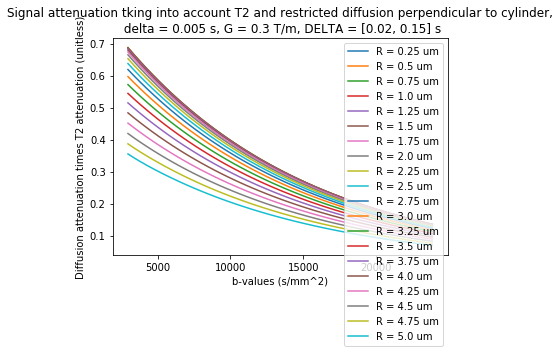

In [61]:
delta = delta_min
G = G_max
ADC = 2e-9 # m^2/s
rad = np.linspace(0.25e-6, 5e-6, 20)

DELTA = np.linspace(2e-2, 1.5e-1) # s

# arbitrary minimum TE formula: 2*delta+DELTA
TE = DELTA+2*delta
T2_attenuation = np.exp(-TE/T2_wm)

bvalues = (gamma*delta*G)**2 * (DELTA - (delta/3.)) # s/m^2

fig = pl.figure()
ax1 = fig.add_subplot(111)
for R in rad:
    data = []
    for bdel in DELTA:
        data.append(np.exp(cyl_par_van(gamma, G, ADC, delta, bdel, R, maxM = 10)))
    diff_attenuation = np.array(data)
    ax1.plot(bvalues*1e-6, T2_attenuation*diff_attenuation, label='R = {} um'.format(R*1e6))
pl.legend()
pl.xlabel('b-values (s/mm^2)')
# pl.xlabel('DELTA (ms)')
pl.ylabel('Diffusion attenuation times T2 attenuation (unitless)')
pl.title('Signal attenuation taking into account T2 and restricted diffusion perpendicular to cylinder,\n delta = {} s, G = {} T/m, DELTA = [{}, {}] s'.format(delta, G, DELTA.min(), DELTA.max()))
pl.show()

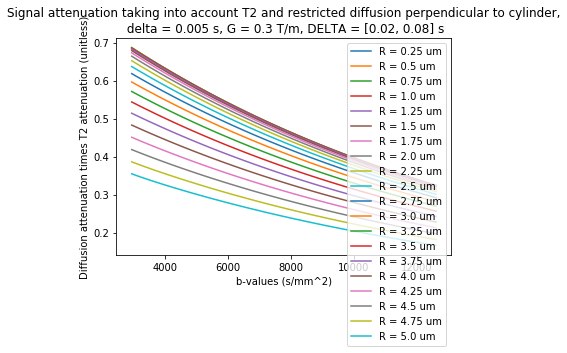

In [62]:
delta = delta_min
G = G_max
ADC = 2e-9 # m^2/s
rad = np.linspace(0.25e-6, 5e-6, 20)

DELTA = np.linspace(2e-2, 8e-2) # s

# arbitrary minimum TE formula: 2*delta+DELTA
TE = DELTA+2*delta
T2_attenuation = np.exp(-TE/T2_wm)

bvalues = (gamma*delta*G)**2 * (DELTA - (delta/3.)) # s/m^2

fig = pl.figure()
ax1 = fig.add_subplot(111)
for R in rad:
    data = []
    for bdel in DELTA:
        data.append(np.exp(cyl_par_van(gamma, G, ADC, delta, bdel, R, maxM = 10)))
    diff_attenuation = np.array(data)
    ax1.plot(bvalues*1e-6, T2_attenuation*diff_attenuation, label='R = {} um'.format(R*1e6))
pl.legend()
pl.xlabel('b-values (s/mm^2)')
# pl.xlabel('DELTA (ms)')
pl.ylabel('Diffusion attenuation times T2 attenuation (unitless)')
pl.title('Signal attenuation taking into account T2 and restricted diffusion perpendicular to cylinder,\n delta = {} s, G = {} T/m, DELTA = [{}, {}] s'.format(delta, G, DELTA.min(), DELTA.max()))
pl.show()

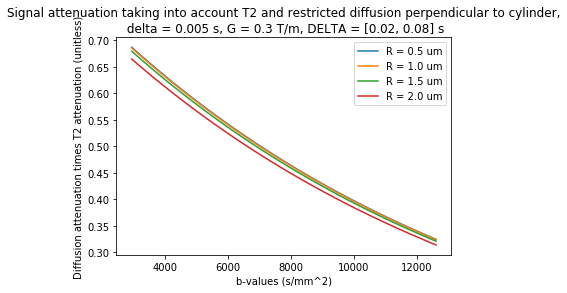

In [63]:
delta = delta_min
G = G_max
ADC = 2e-9 # m^2/s
rad = [0.5e-6, 1e-6, 1.5e-6, 2e-6]

DELTA = np.linspace(2e-2, 8e-2) # s

# arbitrary minimum TE formula: 2*delta+DELTA
TE = DELTA+2*delta
T2_attenuation = np.exp(-TE/T2_wm)

bvalues = (gamma*delta*G)**2 * (DELTA - (delta/3.)) # s/m^2

fig = pl.figure()
ax1 = fig.add_subplot(111)
for R in rad:
    data = []
    for bdel in DELTA:
        data.append(np.exp(cyl_par_van(gamma, G, ADC, delta, bdel, R, maxM = 10)))
    diff_attenuation = np.array(data)
    ax1.plot(bvalues*1e-6, T2_attenuation*diff_attenuation, label='R = {} um'.format(R*1e6))
pl.legend()
pl.xlabel('b-values (s/mm^2)')
# pl.xlabel('DELTA (ms)')
pl.ylabel('Diffusion attenuation times T2 attenuation (unitless)')
pl.title('Signal attenuation taking into account T2 and restricted diffusion perpendicular to cylinder,\n delta = {} s, G = {} T/m, DELTA = [{}, {}] s'.format(delta, G, DELTA.min(), DELTA.max()))
pl.show()

In [ ]:
delta = delta_min
G = G_max
ADC = 2e-9 # m^2/s
rad = [0.5e-6, 1e-6, 1.5e-6, 2e-6]

DELTA = np.linspace(2e-2, 8e-2) # s

# arbitrary minimum TE formula: 2*delta+DELTA
TE = DELTA+2*delta
T2_attenuation = np.exp(-TE/T2_wm)

bvalues = (gamma*delta*G)**2 * (DELTA - (delta/3.)) # s/m^2

fig = pl.figure()
ax1 = fig.add_subplot(111)
for R in rad:
    data = []
    for bdel in DELTA:
        data.append(np.exp(cyl_par_van(gamma, G, ADC, delta, bdel, R, maxM = 10)))
    diff_attenuation = np.array(data)
    ax1.plot(bvalues*1e-6, T2_attenuation*diff_attenuation, label='R = {} um'.format(R*1e6))
pl.legend()
pl.xlabel('b-values (s/mm^2)')
# pl.xlabel('DELTA (ms)')
pl.ylabel('Diffusion attenuation times T2 attenuation (unitless)')
pl.title('Signal attenuation taking into account T2 and restricted diffusion perpendicular to cylinder,\n delta = {} s, G = {} T/m, DELTA = [{}, {}] s'.format(delta, G, DELTA.min(), DELTA.max()))
pl.show()

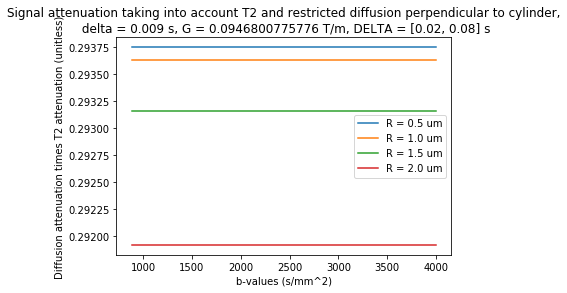

In [68]:
delta = 9e-3
DELTA_max = 8e-2
bval = 4000e6
G = np.sqrt((bval)/(gamma**2*delta**2*(DELTA_max-(delta/3.))))

ADC = 2e-9 # m^2/s
rad = [0.5e-6, 1e-6, 1.5e-6, 2e-6]

DELTA = np.linspace(2e-2, DELTA_max) # s

# arbitrary minimum TE formula: 2*delta+DELTA
TE = np.ones_like(DELTA)*(DELTA_max+2*delta)
T2_attenuation = np.exp(-TE/T2_wm)

bvalues = (gamma*delta*G)**2 * (DELTA - (delta/3.)) # s/m^2

fig = pl.figure()
ax1 = fig.add_subplot(111)
for R in rad:
    data = []
    for bdel in DELTA:
        data.append(np.exp(cyl_par_van(gamma, G, ADC, delta, bdel, R, maxM = 10)))
    diff_attenuation = np.array(data)
    ax1.plot(bvalues*1e-6, T2_attenuation*diff_attenuation, label='R = {} um'.format(R*1e6))
pl.legend()
pl.xlabel('b-values (s/mm^2)')
# pl.xlabel('DELTA (ms)')
pl.ylabel('Diffusion attenuation times T2 attenuation (unitless)')
pl.title('Signal attenuation taking into account T2 and restricted diffusion perpendicular to cylinder,\n delta = {} s, G = {} T/m, DELTA = [{}, {}] s'.format(delta, G, DELTA.min(), DELTA.max()))
pl.show()

In [107]:
# delta = delta_min
# G = G_max
# ADC = 2e-9 # m^2/s
# rad = np.linspace(0.25e-6, 2e-6, 4)

# DELTA = np.linspace(2e-2, 8e-2) # s

# bvalues = (gamma*delta*G)**2 * (DELTA - (delta/3.)) # s/m^2

# fig = pl.figure()
# ax1 = fig.add_subplot(111)
# for R in rad:
#     limit_attenuation = np.exp(-gamma**2*G**2*delta**2*R**2)*np.ones_like(DELTA)
#     data = []
#     for bdel in DELTA:
#         data.append(np.exp(cyl_par_van(gamma, G, ADC, delta, bdel, R, maxM = 10)))
#     diff_attenuation = np.array(data)
#     ax1.plot(bvalues*1e-6, diff_attenuation, label='R = {} um'.format(R*1e6))
#     ax1.plot(bvalues*1e-6, limit_attenuation,'.', label='lim R = {} um'.format(R*1e6))
# pl.legend(loc=4)
# pl.xlabel('b-values (s/mm^2)')
# # pl.xlabel('DELTA (ms)')
# pl.ylabel('Diffusion attenuation (unitless)')
# pl.title('Diffusion attenuation perpendicular to cylinder of various radius,\n delta = {} s, G = {} T/m, DELTA = [{}, {}] s'.format(delta, G, DELTA.min(), DELTA.max()))
# pl.show()

In [115]:
np.sqrt(4*2e-9*5e-3)

6.324555320336759e-06

In [116]:
np.exp(0.01)

1.010050167084168